In [2]:
from keras.preprocessing.image import ImageDataGenerator,img_to_array,load_img
from keras.models import Sequential
from keras.layers import Dense
from keras.applications.vgg16 import VGG16
import matplotlib.pyplot as plt
from glob import glob

In [10]:
train_path = "../fruits-360/Training/"
test_path  = "../fruits-360/Test/"

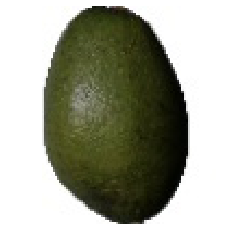

(100, 100, 3)


In [23]:
img = load_img(train_path + "Avocado/10_100.jpg")

plt.imshow(img)
plt.axis("off")
plt.show()

x = img_to_array(img)
print(x.shape)

In [29]:
num_classses = len(glob(train_path+"/*"))

print(num_classses)

131


In [45]:
vgg = VGG16()

In [54]:
vgg_list = vgg.layers
print(len(vgg_list))
for layer in vgg_list:
    print(layer)

23


In [53]:
print(vgg.summary())

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [55]:
model = Sequential()
for i in range(len(vgg_list)-1):
    model.add(vgg_list[i])
    
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [56]:
for layers in model.layers:
    layers.trainable = False

In [57]:
model.add(Dense(num_classses,activation="softmax"))
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [58]:
model.compile(loss="categorical_crossentropy",
             optimizer="rmsprop",
             metrics=["accuracy"])

In [59]:
train_data = ImageDataGenerator().flow_from_directory(train_path,target_size=(224,224))
test_data = ImageDataGenerator().flow_from_directory(test_path,target_size=(224,224))

batch_size = 32

hist = model.fit_generator(train_data,
                           steps_per_epoch=1600//batch_size,
                           epochs=2,
                           validation_data=test_data,
                           validation_steps=800//batch_size)

Found 67692 images belonging to 131 classes.
Found 22688 images belonging to 131 classes.

Epoch 1/2
50/50 [==============================] - 916s 18s/step - loss: 3.7639 - accuracy: 0.4056 - val_loss: 2.4345 - val_accuracy: 0.5950
Epoch 2/2
50/50 [==============================] - 892s 18s/step - loss: 0.8573 - accuracy: 0.7475 - val_loss: 0.7171 - val_accuracy: 0.7113


In [83]:
hist_keys = hist.history

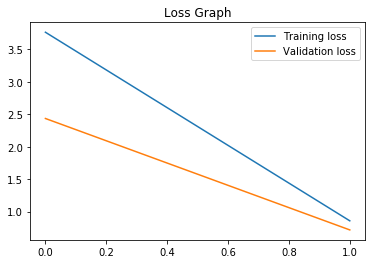

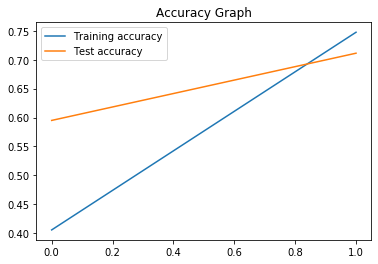

In [87]:
plt.plot(hist_keys["loss"],label="Training loss")
plt.plot(hist_keys["val_loss"],label="Validation loss")
plt.legend()
plt.title("Loss Graph")
plt.show()
plt.figure()
plt.plot(hist_keys["accuracy"],label="Training accuracy")
plt.plot(hist_keys["val_accuracy"],label="Test accuracy")
plt.legend()
plt.title("Accuracy Graph")
plt.show()